In [1]:
%matplotlib inline

# < 퍼셉트론 >

- x_1 을 픽셀 하나하나 라고 생각
- 픽셀의 값이 주어진다는 것은 우리눈에 뭔가보인다.라는 뜻
- 미리 트레이닝이 되있는 어떤 값이 있음
- 그 값과 x와 inner product가되서 (시그마)로 들어감

- 이제 우리는 w값을 어떻게 찾냐?

### 퍼셉트론 손실함수
- o를 판단하는 함수에 o를 넣으면 1 아니면 -1 이 나오도록 트레이닝
- i번째 사진을 집어넣어서 실제로 o면 y_i는 +1, y^_i는 우리가 출력한 것
- 양수면 yes 음수면 ...?? 응? 이해안됨! headside어쩌구

### 가중치 계산
- 옛날거에다가 그레디언트 값을 계속 빼주면 된다.
- 이식을 다시쓴것이 공책에있음

### SGD
- 계속돌리면 정확한 w쪽으로 가긴감..

### Scikit-Learn 의 퍼셉트론 구현
- `SGDClassifier` 아까쓴거는 perceptron loss function이었는데 여기서 다른것도 정할수 있음
- stockestic gradient는 정확한 값을 찾지 못하기 때문에 수렴해야 되는 부분에서도 계속해서 에러가 발생 (in 노트)
- 여기서 알수있는것은?
    - 가장큰 문제는 답이 하나가 아님 
    - 이번 예시를 보면 함수가 다르지만 둘다 정확히 분류!

##### 위 퍼셉트론에서 값들에서 가장 멀리 떨어져있는 경계선을 찾자 = SVM

# 서포트 벡터 머신

- 경계선에서 가장 가까운 데이터들을 suport or suport vector 라고 부름
- support벡터간의 거리(Margin)를 가장 크게하는 것을 찾는것

### 서포트와 마진
- 직선으로 판별함수를 만듬
- 선형대수와 해석기하에서 맨 마지막부분 w.Tx - w_0 = 0 (in note)
- f(x+)를 scaling 하거나 몇으로 나누어도 분류함에있어서 영향을 미치지는 않음
- 그래서 우리마음대로 서포트벡터가 +1 , -1 가 되도록 scaling을 해준다!
- 마진은 어떻게 계산이되냐? 여기 나와있는 식처럼됨!
- 마진은 두개의 합 이니깐 2/||w||
- 우리가 원하는 것은 마진이 가장 큰것을 원함
- 2/||w||가 가장 크려면 분모가 가장 작아지면 됨
- 그런데 이상태로는 불편해! 그렇니깐 L 같이 바꿔줌
- 분류를 잘하면서 ||w||값이 가장 작도록!

- 아까 우리가 +1보다 크게 -1보다 작게로 해놨으니깐 이식의 두개의 곱은 항상 1보다 크거나 같다!
- 지금 이것은 가장 완벽한 함수를 만들겠다가 기준이니깐 -의 경우는 생각 안함
- 부등식이 N개가 있는데 그 부등식이 다성립해야함
- 부등식이 있는 최적화 문제
    - 원래풀어야할 최적화 문제에다가 부등식 * 라그랑주 멀티플레이어 를 데이터 갯수만큼해줘야함
- 마지막 L을 최적화하는 조건 = KKT조건!
    - 이게 뭐였냐면 w에 대해서는 gradient가 0이 되어야하고 a에 대해서는 0이 되어야함
    - w에 대한 미분 값은 0이 되어야하지만 ....?? 모르겠음
    - 서포트벡터에 대해서는 a값이 0이 아니지만 나머지 애들에 대해서는 a가 0
    - 실제로 계산하면 +에 대한 서포트벡터 -에 대한 서포트벡터 2개만 살아남음

### Dual Form
- 적어도 w에 대한 미분은 0이되어야한다고 위에 말했음
- 여기서 w에 대한 것을 구했으니깐 위에 L에 대한 식에 대입하셈
- 그와중에 w0 위에있는 식이 0이었으니깐 밑에 L만 남음
- 이제 이식을 가장 작게하는 a값만 찾으면 됨
- y_i뒤에 부분은 다 스칼라값 그래서 쿼드라틱 폼임
- 이것을 최적화 하는 것을 quadratic programming 라고 함
- a벡터와 y벡터를 inner product를 하면 0이 되야한다.라는 제한 조건이 있어야함
- 그러나 이런것은 계산에 있어서 문제가 안됨! 계산량이 빠름
- a값은 위에서 계산했고 y는 +1,-1이고 나머지는 inner procuct
- 사실 서포트벡터 빼고는 나머지a는 다 0 이라고 했음
- 그래서 sumation기호가 있지만 다필요없고 서포트벡터에 대해서만 값을 구하면 됨
- x와 x+ 그리고 x와 x- 이 두개의 inner product(둘의 유사도를 나타냄)를 구한뒤 이 둘을 빼줬을때 +인지 -인지만 보면됨!
- 그래서 앞에서 여러가지를 많이 해줬지만 결국엔 그냥 마지막f(x)의 계산만 해주면 됨


- `if` suport vector가 여러개일때는 +들과 x 의 inner procut의 평균 -들과 x의 inner product의 평균을 빼주는 것으로 계산

### Scikit-Learn의 서포트 벡터 머신

In [2]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [69]:
X = iris.data[:,0:2][iris.target != 2]
y = iris.target[iris.target != 2]

In [74]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

In [75]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

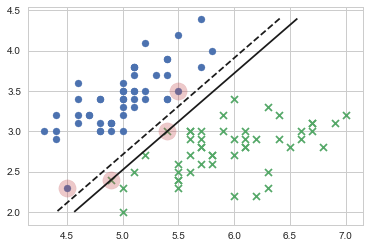

In [89]:
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]

levels = [0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)
plt.show()

### 슬랙 변수
- 각 데이터마다 얼마만큼을 봐줄건가 하는 봐주는 값을 크사이 라는 변수로 정의
- 이것을 슬랙변수라고 함
- 그래서 슬랙변수에 대한 라그랑주를 만들어줌
- 그리고 마지막으로 봐주는 값이 되도록이면 적게 하기위해서 넣어줌
- C값이 커지면 크사이를 되도록 발행을 안하려고 함 그래서 C가 커지면 크사이가 작아지고 C가 작아지면 슬랙변수를 발행
- C가 커지면 미스한 것은 신경을 안쓰고 마진을 키우려고 노력함

# 커널 서포트 벡터 머신

### XOR 문제

### 기저 함수를 사용한 비선형 판별 모형
- 문제는 basis함수를 잘잡아야해!

### 커널 트릭
- loss function을 아까 외우라했음
- 이것들을 최소화하는 a를 찾아라!
- prediction은 밑에 y값
- x를 파이로바꿔!
- 여기서 파이는 파이"벡터"!
- 보니깐 파이는 항상 다른 파이랑 inner product한 형태로나옴 이것들은 다 스칼라
- 파이를 엄청많이 만들어봤자 결국 스칼라값을 쓰게됨
- 이 스칼라를 커널이라는 이름을 붙임 = k
- (x는 테스트에 쓸x)
- 결국 x값 두개가 들어가서 스칼라 값이 나오는 함수가 있으면 되는 거임
- 몇가지 룰만 지키면 커널을 얼마든지 만들수있음!
- 그래서 파이들을 일일이 생각하는 것보다 커널을 생각하는 것이 간단

### 커널의 의미
- 그럼 어떤 커널을 써야 좋은 효과를 내냐?
- inner product는 simillarity

### 커널 사용의 장점
- 계산량이 줄어듬
- 아까 

### 많이 사용되는 커널
- 여긴오는 다항커널은 다 similarity들임
- 순서만 안바뀌면 됨
- 시그모이드 함수를 씌우겠다 씌워도 커널함수= 시구모이드 커널
- 가장 많이 쓰이는 것은 RBF
    - 시밀러리티는 distance의 역수잖아요!
    - 그냥 아예 처음 부터 거리를 잼
    - 거리가 작아지면(similarity가 높으면) 1쪽으로
    - 거리가 멀어지면 값이 0으로감
    - 무한 차원의 basis funcion이 나옴
    - 어떠한 비선형성도 잡아냄
    - 사실 얘만 쓰임
- default는 RBF임

### 커널 파라미터
- 우리는 감마라고 하는 파라미터를 알아야 함 in 노트

# 모형 최적화 - 못들음...

### 병렬 처리
- n_jobs 라고 하는 인수는 멀티 프로세싱
- 한컴퓨터 안에서 코어가 여러개 있을때 그 코어에 수만큼 n_jobs를 늘리면 빨라짐
- 정확하게 두배 빨라지지는 않음 = 배분해주는 시간, 결과 통합시간, 제일 마지막 반환하는 애를 기다리는것
- 얘는 한컴퓨터 내에서 코어가 여러개인 애들에서만 쓸수있음
- 내가 분산 컴퓨팅을 하려면???
    - 우리가 쓸수있는 것중에서 가장 쉬운 것은?
    - dask라는 것임

# 비대칭 데이터 문제

- 데이터수가 너무 차이 나가는 것을 비대칭 데이터라고 함
- ex) 희귀병!
- 여기나온 것들은 다 알필요는 없음
- imbalanced 패키지를 알려주려고 함
- 여러가지 tset를 해보고 맞는것을 쓰는 수밖에 없음
- 가장 간단하게 데이터를 만드는 방법은 샘플하나에 대해서 가우시안 분포라고 생각하고 만듬
- 이건 위험 하다! 라고 하다면 데이터 사이에 데이터가 만들어 지는 방법